In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from subprocess import check_output

In [7]:
laliga=pd.read_csv('FMEL_Dataset.csv')
laliga=laliga[laliga.division==1]

In [8]:
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [9]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17169 entries, 0 to 36684
Data columns (total 10 columns):
id              17169 non-null int64
season          17169 non-null object
division        17169 non-null int64
round           17169 non-null int64
localTeam       17169 non-null object
visitorTeam     17169 non-null object
localGoals      17169 non-null int64
visitorGoals    17169 non-null int64
date            17169 non-null object
timestamp       17169 non-null int64
dtypes: int64(6), object(4)
memory usage: 1.4+ MB


In [10]:
laliga['local_team_won']=laliga.apply(lambda row: 1 if row['localGoals']>row['visitorGoals'] else 0,axis=1)
laliga['visitor_team_won']=laliga.apply(lambda row: 1 if row['localGoals']<row['visitorGoals'] else 0,axis=1)
laliga['draw']=laliga.apply(lambda row: 1 if row['localGoals']==row['visitorGoals'] else 0,axis=1)

In [11]:
laliga.tail()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_team_won,visitor_team_won,draw
36680,36681,2017-18,1,38,Villarreal,Real Madrid,2,2,19/05/2018,1526680800,0,0,1
36681,36682,2017-18,1,38,Atletico de Bilbao,Espanol,0,1,20/05/2018,1526767200,0,1,0
36682,36683,2017-18,1,38,Barcelona,Real Sociedad,1,0,20/05/2018,1526767200,1,0,0
36683,36684,2017-18,1,38,Valencia,Deportivo,2,1,20/05/2018,1526767200,1,0,0
36684,36685,2017-18,1,38,Atletico de Madrid,Eibar,2,2,20/05/2018,1526767200,0,0,1


In [12]:
df=laliga.copy()

In [13]:
a=df.groupby(['season','localTeam'])['local_team_won'].sum().reset_index().rename(columns={'localTeam': 'club','local_team_won': 'won'})
b=df.groupby(['season','visitorTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club','visitor_team_won': 'won'})
c=df.groupby(['season','localTeam'])['draw'].sum().reset_index().rename(columns={'localTeam': 'club','draw': 'draw'})
d=df.groupby(['season','visitorTeam'])['draw'].sum().reset_index().rename(columns={'visitorTeam': 'club','draw': 'draw'})
e=df.groupby(['season','localTeam'])['visitor_team_won'].sum().reset_index().rename(columns={'localTeam': 'club','visitor_team_won': 'lost'})
f=df.groupby(['season','visitorTeam'])['local_team_won'].sum().reset_index().rename(columns={'visitorTeam': 'club','local_team_won': 'lost'})

In [14]:
point_table=a.merge(b,on=['season','club']).merge(c,on=['season','club']).merge(d,on=['season','club']).merge(e,on=['season','club']).merge(f,on=['season','club'])
point_table.head()

,season,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
0,1970-71,Atletico de Bilbao,11,3,3,4,1,8
1,1970-71,Atletico de Madrid,13,4,2,6,0,5
2,1970-71,Barcelona,11,8,1,4,3,3
3,1970-71,CD Malaga,6,2,6,6,3,7
4,1970-71,Celta de Vigo,12,3,3,2,0,10


In [15]:
point_table= point_table.rename(columns={'won_x':'home_win','won_y':'away_win','lost_x':'home_loss','lost_y':'away_loss'})
point_table['matches_won']=point_table.home_win+point_table.away_win
point_table['matches_lost']=point_table.home_loss+point_table.away_loss
point_table['matches_drawn']=point_table.draw_x+point_table.draw_y
point_table=point_table.drop(['draw_x','draw_y'],axis=1)
point_table['total_matches']=point_table.matches_won+point_table.matches_lost+point_table.matches_drawn

In [16]:
point_table['points']=(point_table.matches_won*3)+(point_table.matches_drawn*1)

In [19]:
point_table.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points
923,2017-18,Real Madrid,12,10,3,3,22,6,10,38,76
924,2017-18,Real Sociedad,10,4,6,11,14,17,7,38,49
925,2017-18,Sevilla,11,6,3,11,17,14,7,38,58
926,2017-18,Valencia,13,9,3,6,22,9,7,38,73
927,2017-18,Villarreal,11,7,5,8,18,13,7,38,61


In [20]:
g=df.groupby(['season','localTeam'])['localGoals'].sum().reset_index().rename(columns={'localTeam': 'club','localGoals': 'home_goals'})
h=df.groupby(['season','visitorTeam'])['visitorGoals'].sum().reset_index().rename(columns={'visitorTeam': 'club','visitorGoals': 'away_goals'})
i=df.groupby(['season','localTeam'])['visitorGoals'].sum().reset_index().rename(columns={'localTeam': 'club','visitorGoals': 'goals_conceded'})
j=df.groupby(['season','visitorTeam'])['localGoals'].sum().reset_index().rename(columns={'visitorTeam': 'club','localGoals': 'goals_conceded'})

In [21]:
point_table=point_table.merge(g,on=['season','club']).merge(h,on=['season','club']).merge(i,on=['season','club']).merge(j,on=['season','club'])

In [22]:
point_table['goals_scored']=point_table.home_goals+point_table.away_goals
point_table['goals_conceded']=point_table.goals_conceded_x+point_table.goals_conceded_y
point_table['goal_difference']=point_table.goals_scored-point_table.goals_conceded
point_table= point_table.drop(['goals_conceded_x','goals_conceded_y'],axis=1)

In [23]:
point_table= point_table.sort_values(by=['season','points','goal_difference']).reset_index().drop('index',axis=1)

In [24]:
point_table.tail(n=20).sort_values('points',ascending=False)


,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
927,2017-18,Barcelona,16,12,0,1,28,1,9,38,93,53,46,99,29,70
926,2017-18,Atletico de Madrid,12,11,1,4,23,5,10,38,79,30,28,58,22,36
925,2017-18,Real Madrid,12,10,3,3,22,6,10,38,76,54,40,94,44,50
924,2017-18,Valencia,13,9,3,6,22,9,7,38,73,36,29,65,38,27
923,2017-18,Villarreal,11,7,5,8,18,13,7,38,61,35,22,57,50,7
922,2017-18,Betis,10,8,5,9,18,14,6,38,60,35,25,60,61,-1
921,2017-18,Sevilla,11,6,3,11,17,14,7,38,58,31,18,49,58,-9
920,2017-18,Getafe,9,6,6,7,15,13,10,38,55,26,16,42,33,9
919,2017-18,Eibar,8,6,7,8,14,15,9,38,51,26,18,44,50,-6
918,2017-18,Girona,8,6,8,7,14,15,9,38,51,26,24,50,59,-9


In [25]:
df=point_table.copy()


In [26]:
champs=df[df.groupby(['season'])['points'].transform(max)==df.points].reset_index()
champs.tail(12)

,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
37,707,2006-07,Barcelona,14,8,0,6,22,6,10,38,76,41,37,78,33,45
38,727,2007-08,Real Madrid,17,10,2,5,27,7,4,38,85,53,31,84,36,48
39,747,2008-09,Barcelona,14,13,2,3,27,5,6,38,87,61,44,105,35,70
40,767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
41,787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74
42,807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
43,827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75
44,847,2013-14,Atletico de Madrid,15,13,0,4,28,4,6,38,90,49,28,77,26,51
45,867,2014-15,Barcelona,16,14,2,2,30,4,4,38,94,64,46,110,21,89
46,887,2015-16,Barcelona,16,13,2,3,29,5,4,38,91,67,45,112,29,83


In [27]:
champs=champs.drop(champs.index[[37]])
champs.tail(12)

,index,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
36,706,2006-07,Real Madrid,12,11,3,5,23,8,7,38,76,32,34,66,40,26
38,727,2007-08,Real Madrid,17,10,2,5,27,7,4,38,85,53,31,84,36,48
39,747,2008-09,Barcelona,14,13,2,3,27,5,6,38,87,61,44,105,35,70
40,767,2009-10,Barcelona,18,13,0,1,31,1,6,38,99,57,41,98,24,74
41,787,2010-11,Barcelona,16,14,1,1,30,2,6,38,96,46,49,95,21,74
42,807,2011-12,Real Madrid,16,16,1,1,32,2,4,38,100,70,51,121,32,89
43,827,2012-13,Barcelona,18,14,0,2,32,2,4,38,100,63,52,115,40,75
44,847,2013-14,Atletico de Madrid,15,13,0,4,28,4,6,38,90,49,28,77,26,51
45,867,2014-15,Barcelona,16,14,2,2,30,4,4,38,94,64,46,110,21,89
46,887,2015-16,Barcelona,16,13,2,3,29,5,4,38,91,67,45,112,29,83


In [28]:
champs.club.value_counts().reset_index()

,index,club
0,Real Madrid,21
1,Barcelona,18
2,Atletico de Madrid,4
3,Valencia,2
4,Deportivo,1
5,Real Sociedad,1
6,Atletico de Bilbao,1


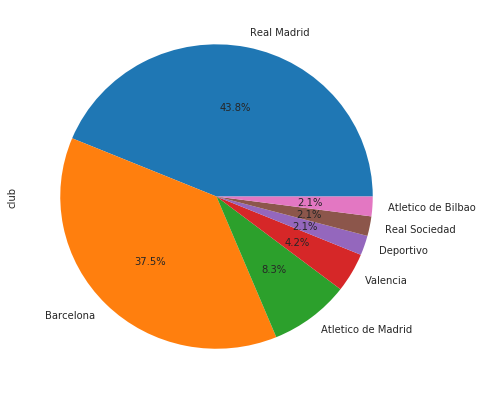

In [29]:
champs.club.value_counts().plot(kind='pie', autopct='%2.1f%%', figsize=(7,7))

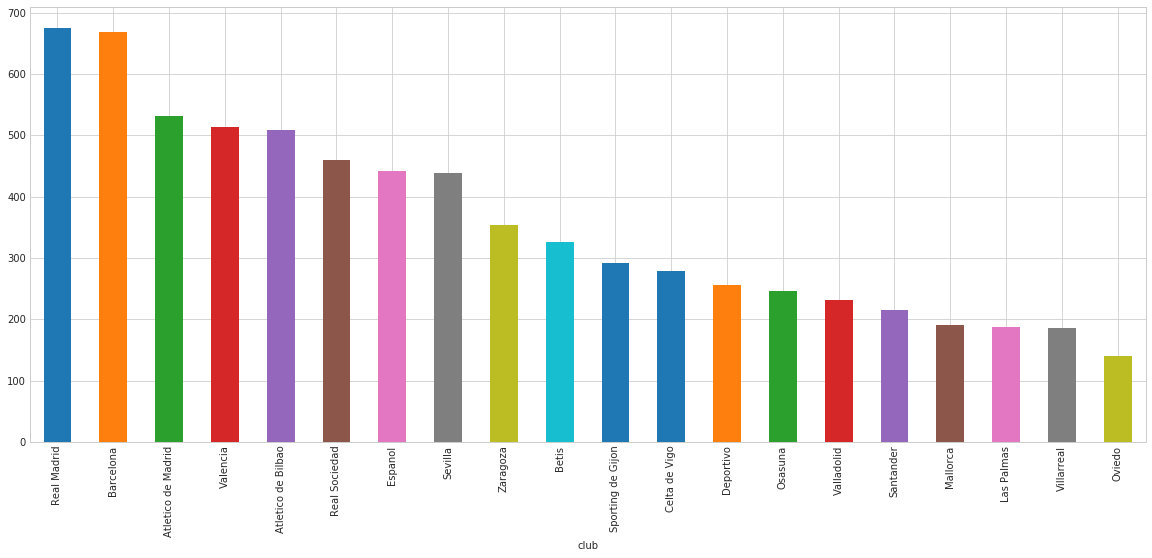

In [30]:
df.groupby(['club'])['home_win'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

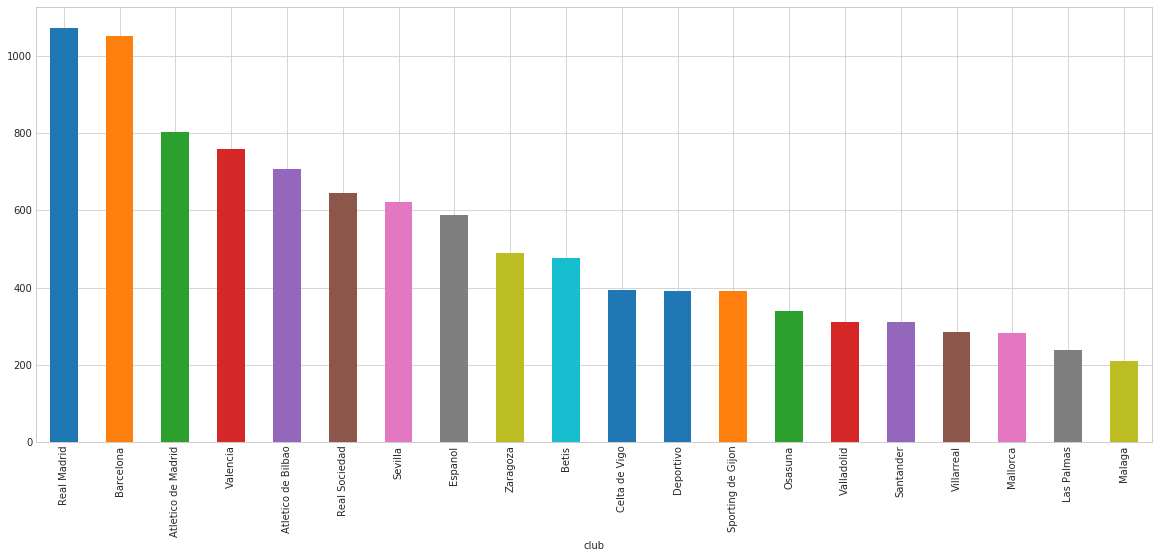

In [31]:
df.groupby(['club'])['matches_won'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

In [32]:
df.groupby(['club'])['goals_scored'].sum().sort_values(ascending=False).head(20)

club
Real Madrid           3673
Barcelona             3671
Atletico de Madrid    2620
Valencia              2547
Atletico de Bilbao    2386
Real Sociedad         2200
Sevilla               2068
Espanol               2019
Zaragoza              1836
Betis                 1670
Sporting de Gijon     1383
Celta de Vigo         1361
Deportivo             1319
Santander             1174
Osasuna               1133
Valladolid            1120
Mallorca               994
Villarreal             949
Las Palmas             866
Malaga                 779
Name: goals_scored, dtype: int64

In [33]:
w=df.groupby(['club'])['home_goals'].sum().sort_values(ascending=False).head(20).reset_index()
x=df.groupby(['club'])['away_goals'].sum().sort_values(ascending=False).head(20).reset_index()
y=df.groupby(['club'])['goals_scored'].sum().sort_values(ascending=False).head(20).reset_index()
z=w.merge(x,on=['club']).merge(y,on=['club'])
a=df.groupby(['club'])['home_win'].sum().sort_values(ascending=False).head(20).reset_index()
b=df.groupby(['club'])['away_win'].sum().sort_values(ascending=False).head(20).reset_index()
c=df.groupby(['club'])['matches_won'].sum().sort_values(ascending=False).head(20).reset_index()
z=a.merge(b,on=['club']).merge(c,on=['club']).merge(z,on=['club'])

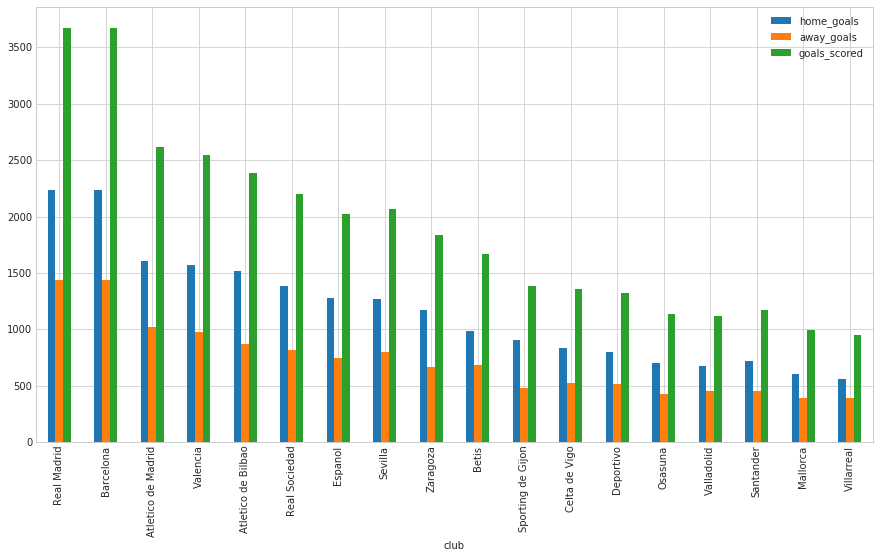

In [34]:
z.plot(x='club',y=['home_goals','away_goals','goals_scored'], kind="bar",figsize=(15,8))

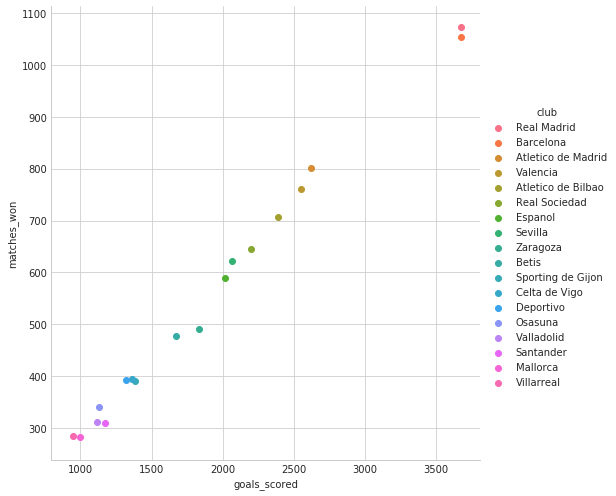

In [35]:
sns.FacetGrid(z, hue="club", size=7).map(plt.scatter, "goals_scored", "matches_won").add_legend()
    

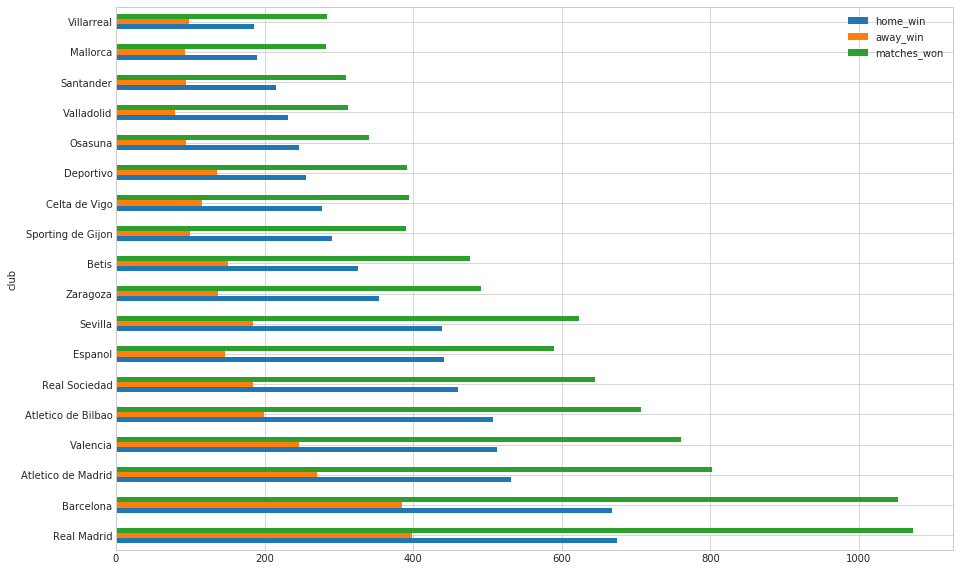

In [36]:
z.plot(x='club',y=['home_win','away_win','matches_won'], kind="barh",figsize=(15,10))
